In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Da cambiare
with open('/content/drive/MyDrive/Colab Notebooks/Tesi/Iteration improvement/Results/Filter2/resultsLSTM.json') as f:
    data = json.load(f)

print(data)

[{'R2': -1.182936793326511, 'MAE': 0.16453343380409227, 'RMSE': 0.19226070501361942, 'Hidden Units': 128, 'Learning Rate': 0.01, 'Number of Epochs': 200, 'Number of Iterations': 5, 'training_time': 43.965853214263916}, {'R2': -1.1814012136782455, 'MAE': 0.16909009117378654, 'RMSE': 0.19219307053952944, 'Hidden Units': 192, 'Learning Rate': 0.001, 'Number of Epochs': 200, 'Number of Iterations': 5, 'training_time': 64.65098595619202}, {'R2': -5.929879510953396, 'MAE': 0.3299721429888705, 'RMSE': 0.34255695686407117, 'Hidden Units': 192, 'Learning Rate': 0.001, 'Number of Epochs': 200, 'Number of Iterations': 5, 'training_time': 63.42295742034912}, {'R2': -0.004647083947187491, 'MAE': 0.10015823036618622, 'RMSE': 0.13042976567877249, 'Hidden Units': 64, 'Learning Rate': 0.1, 'Number of Epochs': 200, 'Number of Iterations': 5, 'training_time': 22.880297899246216}, {'R2': -5.180612960268781, 'MAE': 0.2960033868441735, 'RMSE': 0.32350852098808525, 'Hidden Units': 192, 'Learning Rate': 0.1, 

In [4]:
# Use pd.json_normalize to convert the JSON to a DataFrame
df = pd.json_normalize(data)

# Display the DataFrame
df.head()

,R2,MAE,RMSE,Hidden Units,Learning Rate,Number of Epochs,Number of Iterations,training_time
0,-1.182937,0.164533,0.192261,128,0.010,200,5,43.965853
1,-1.181401,0.169090,0.192193,192,0.001,200,5,64.650986
2,-5.929880,0.329972,0.342557,192,0.001,200,5,63.422957
3,-0.004647,0.100158,0.130430,64,0.100,200,5,22.880298
4,-5.180613,0.296003,0.323509,192,0.100,200,5,63.477971


# Plot

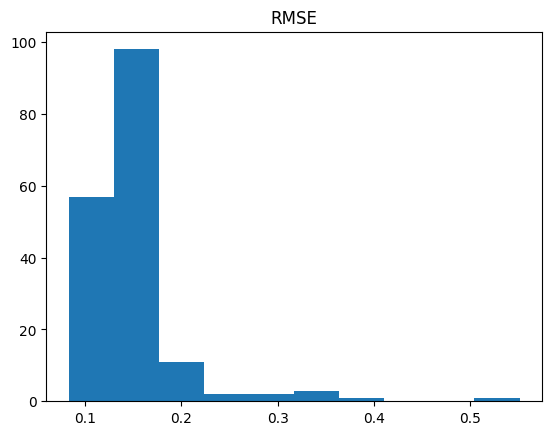

In [5]:
ax = df.hist(column='RMSE', grid=False)

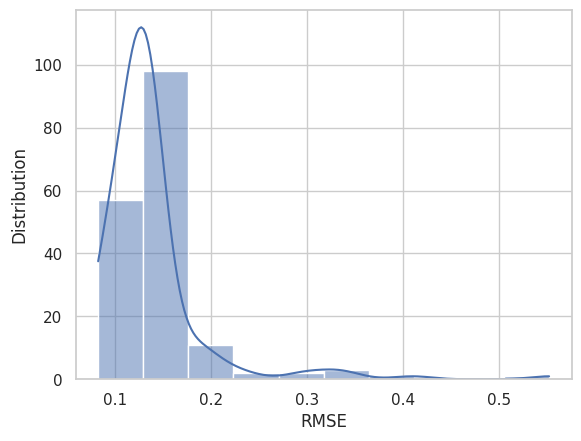

In [6]:
sns.set(style="whitegrid")

ax = sns.histplot(data=df, x='RMSE', kde=True, bins=10)

ax.set_ylabel('Distribution')

plt.show()

# Select the best data

In [7]:
mu = df['RMSE'].mean()
std = df['RMSE'].std()

print(f"mean: {round(mu, 2)}")
print(f"standard deviation: {round(std, 2)}")

mean: 0.14
standard deviation: 0.06


In [8]:
subset = df[(df["RMSE"] < mu + 2*std) & ( df["R2"] >0)]
subset.sort_values(by=['R2'], inplace=True, ascending=False)

subset = subset.iloc[:5]

subset

<ipython-input-8-402a4b7284b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.sort_values(by=['R2'], inplace=True, ascending=False)


,R2,MAE,RMSE,Hidden Units,Learning Rate,Number of Epochs,Number of Iterations,training_time
87,0.597139,0.059381,0.082594,128,0.001,300,20,57.938079
27,0.584689,0.061195,0.083860,64,0.001,200,20,24.362310
80,0.565041,0.060141,0.085821,192,0.001,300,10,84.355798
145,0.560436,0.059784,0.086274,192,0.001,400,10,112.363994
10,0.555610,0.059725,0.086747,64,0.001,200,10,22.916694


# 3D plot

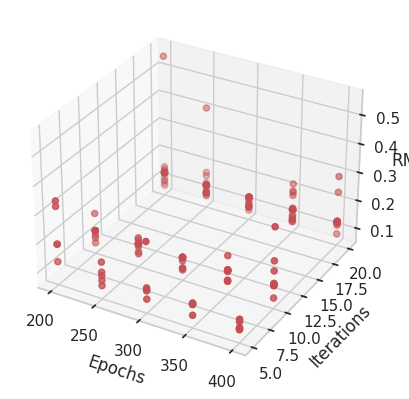

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df["Number of Epochs"],df["Number of Iterations"], df["RMSE"], c='r', marker='o')

# Set labels
ax.set_xlabel('Epochs')
ax.set_ylabel('Iterations')
ax.set_zlabel('RMSE')

# Show the plot
plt.show()